In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001129838/DailyCustomers.csv', index_col=0)
print(data.head())

store_marketing = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001129838/StoreMarketing.csv', index_col=0)
store_overheads = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001129838/StoreOverheads.csv', index_col=0)
store_size = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001129838/StoreSize.csv', index_col=0)
store_staff = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001129838/StoreStaff.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['Total Customers'] = data.sum().values
summary_data['Marketing'] = store_marketing.values
summary_data['Store Overheads'] = store_overheads.values
summary_data['Store Size'] = store_size.values
summary_data['Store Staff'] = store_staff.values


print(summary_data.head())
print(summary_data.tail())
print(summary_data.describe())

            PAA  DZT  WMB   SMM  BZM  NMO  ...  YYO  MUY  CFG  ATT  XML  DTJ
Date                                       ...                              
2019-01-01  609   56   87  1094   67    0  ...    0  386   74   75   87   67
2019-01-02  533   62   81   943   78    0  ...    0  364   68   45   76   67
2019-01-03  454   63   98   793   78    0  ...    0  323   82   55   69   76
2019-01-04  447   55   72   726   74    0  ...    0  289   66   50   68   68
2019-01-05  537   57   90   741   75    0  ...    0  289   69   65   71   74

[5 rows x 40 columns]
     Total Customers  Marketing  Store Overheads  Store Size  Store Staff
PAA           191888      18000            12000        1095           10
DZT            21864       3000            12000         322            3
WMB            33038       4000            27000         731            8
SMM           315613      33000            33000        4514           28
BZM            27305       3000            79000         203        

The above exploration shows the summary of all the data available i.e. Total Customers, marketing budget, Store overheads, Store size and Store staff for each store 

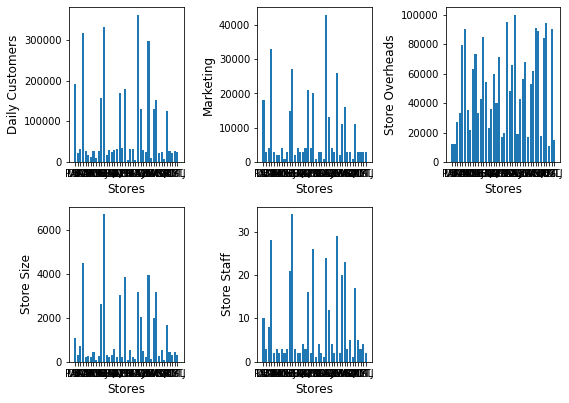

In [3]:
plt.figure(figsize=(8, 8))
counter = 1
x_pos = np.arange(len(summary_data.index))
for attribute in summary_data:
    sub = plt.subplot(3, 3, counter)
    sub.bar(x_pos, summary_data[attribute], align='center')
    sub.set_xticks([])
    sub.set_xticks(x_pos)
    sub.set_xticklabels(summary_data.index)
    sub.set_xlabel('Stores', fontsize=12)
    sub.set_ylabel(attribute, fontsize=12)
    counter += 1
plt.tight_layout()
plt.show()

The above explorations shows a bar graph representation of all the columns. Every value represented can be correlated with each other but for better correlations we will explore further

     Total Customers  Marketing  Store Overheads  Store Size  Store Staff
PAA         0.530285   0.418605             0.12    0.162801     0.294118
DZT         0.060421   0.069767             0.12    0.047874     0.088235
WMB         0.091301   0.093023             0.27    0.108683     0.235294
SMM         0.872201   0.767442             0.33    0.671127     0.823529
BZM         0.075458   0.069767             0.79    0.030181     0.058824


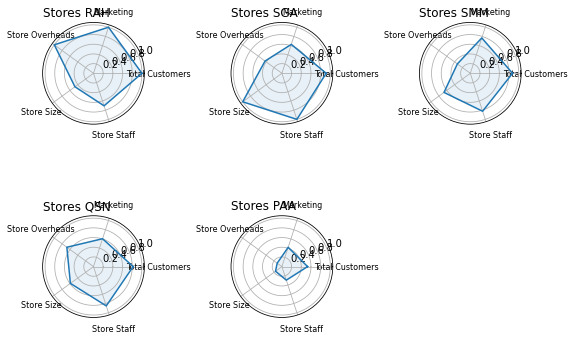

In [22]:
normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

selected = ['RAH', 'SGA', 'SMM', 'QSN', 'PAA']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(3, 3, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Stores ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

The above radar plot shows attributes for top 5 performing stores. 

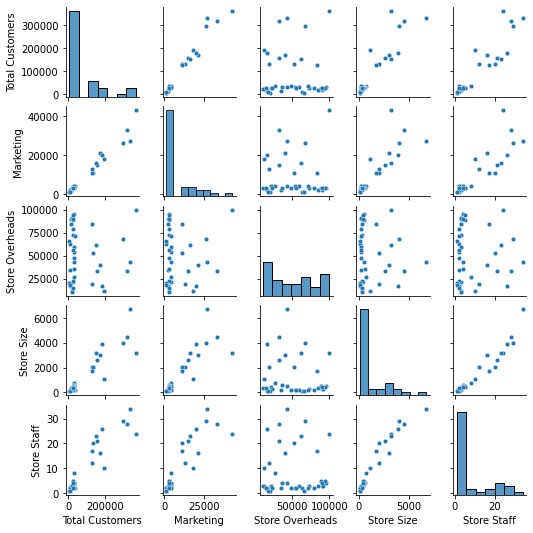

In [9]:
import seaborn as sns

sns.pairplot(summary_data, height=1.5, plot_kws={'s': 20})
plt.show()


The above pair plot shows correlation between each other. but nothing in particular can be concluded easily. For better correlation we will plot a heat graph.

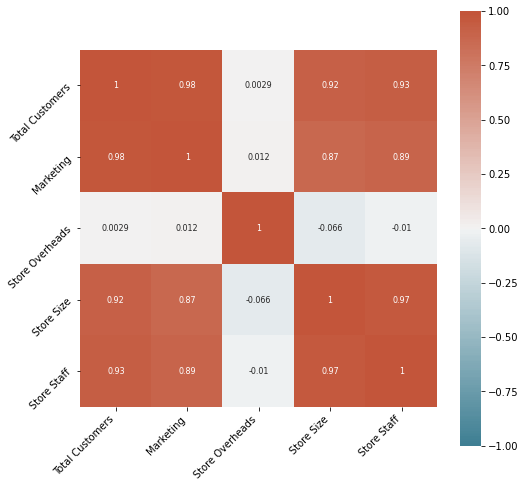

In [20]:
plt.figure(figsize=(8, 8))
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')
plt.show()

The above heat map shows correlation between each other and it can be seen that the amount of customers entering the shop depends on the amount of marketing done and also on the size of the store. 